In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt  # import statement
%matplotlib inline

#reading the csv file
df=pd.read_csv('/kaggle/input/seedsdataset/seedsdataset.csv', delimiter=';')

#sampling data 
df=df.sample(frac=0.5,random_state=3)

#preview of the data
df.head(5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,3
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,2
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,2
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
128,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,2


In [2]:
#checking how many seeds are on each seed type
df['seedType'].value_counts()

seedType
2    38
1    36
3    31
Name: count, dtype: int64

In [3]:
#Checking the data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 164 to 65
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  105 non-null    float64
 1   perimeter             105 non-null    float64
 2   compactness           105 non-null    float64
 3   lengthOfKernel        105 non-null    float64
 4   widthOfKernel         105 non-null    float64
 5   asymmetryCoefficient  105 non-null    float64
 6   lengthOfKernelGroove  105 non-null    float64
 7   seedType              105 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


In [4]:
df=df.sample(frac=1,random_state=3)
y=df['seedType']
x=df.drop('seedType',axis=1)

df['seedType'].value_counts()

seedType
2    38
1    36
3    31
Name: count, dtype: int64

In [5]:
#checking the median and max for each one of the attributes
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,14.974286,14.596857,0.873644,5.636800,3.278933,3.578116,5.421095,1.952381
std,2.988076,1.357379,0.022177,0.466863,0.378172,1.505428,0.511804,0.801212
min,10.590000,12.410000,0.809900,4.899000,2.630000,0.765100,4.607000,1.000000
25%,12.460000,13.380000,0.862500,5.224000,2.967000,2.270000,5.046000,1.000000
50%,14.920000,14.520000,0.877900,5.563000,3.312000,3.600000,5.219000,2.000000
75%,17.260000,15.730000,0.888300,6.017000,3.562000,4.677000,5.879000,3.000000
max,20.970000,17.250000,0.910800,6.675000,4.032000,8.315000,6.550000,3.000000


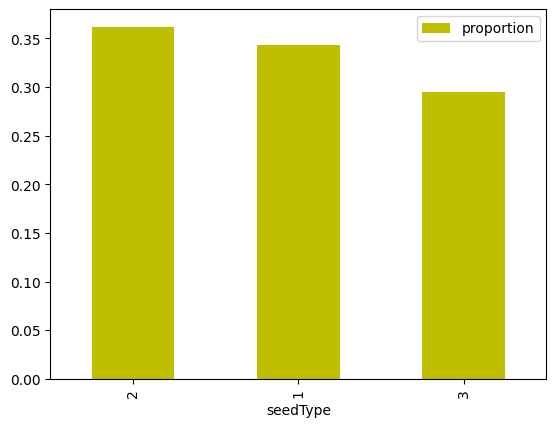

In [6]:
df['seedType'].value_counts(normalize=True).plot.bar(color='y')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


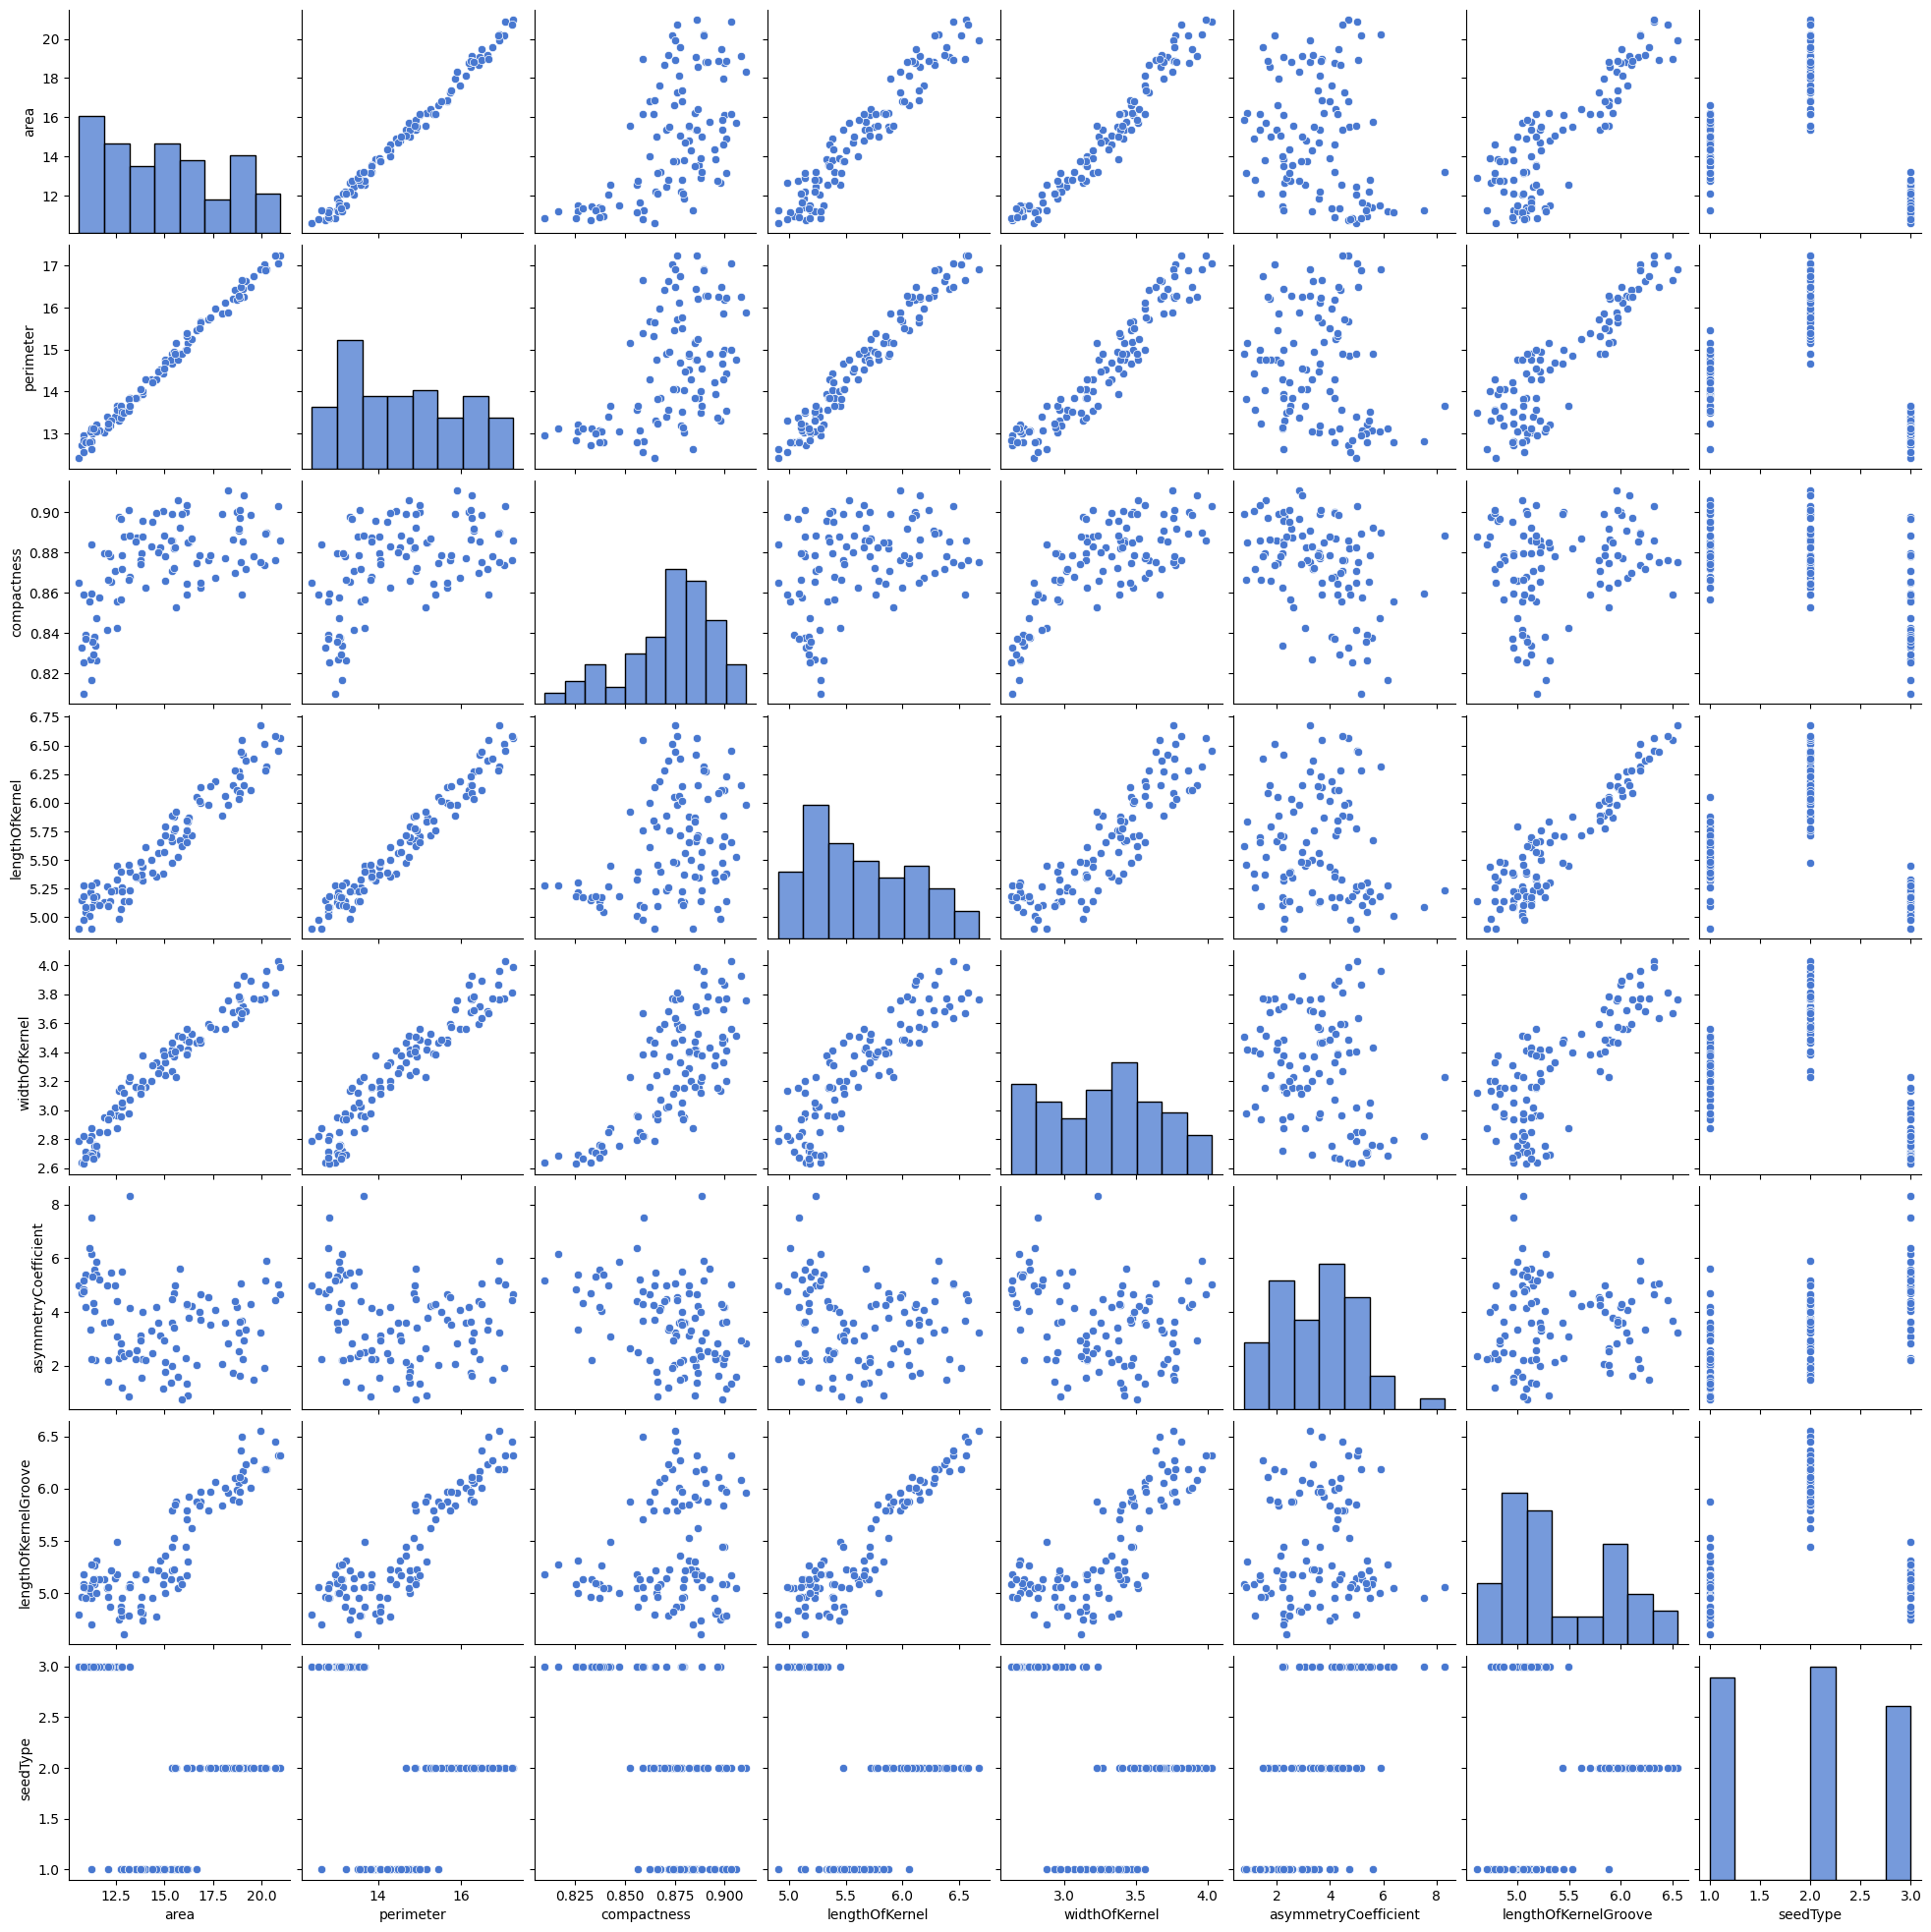

In [7]:
#using subplot grid for plotting pairwise relationships in the dataset
sns.set_palette("muted")
sns.pairplot(df)

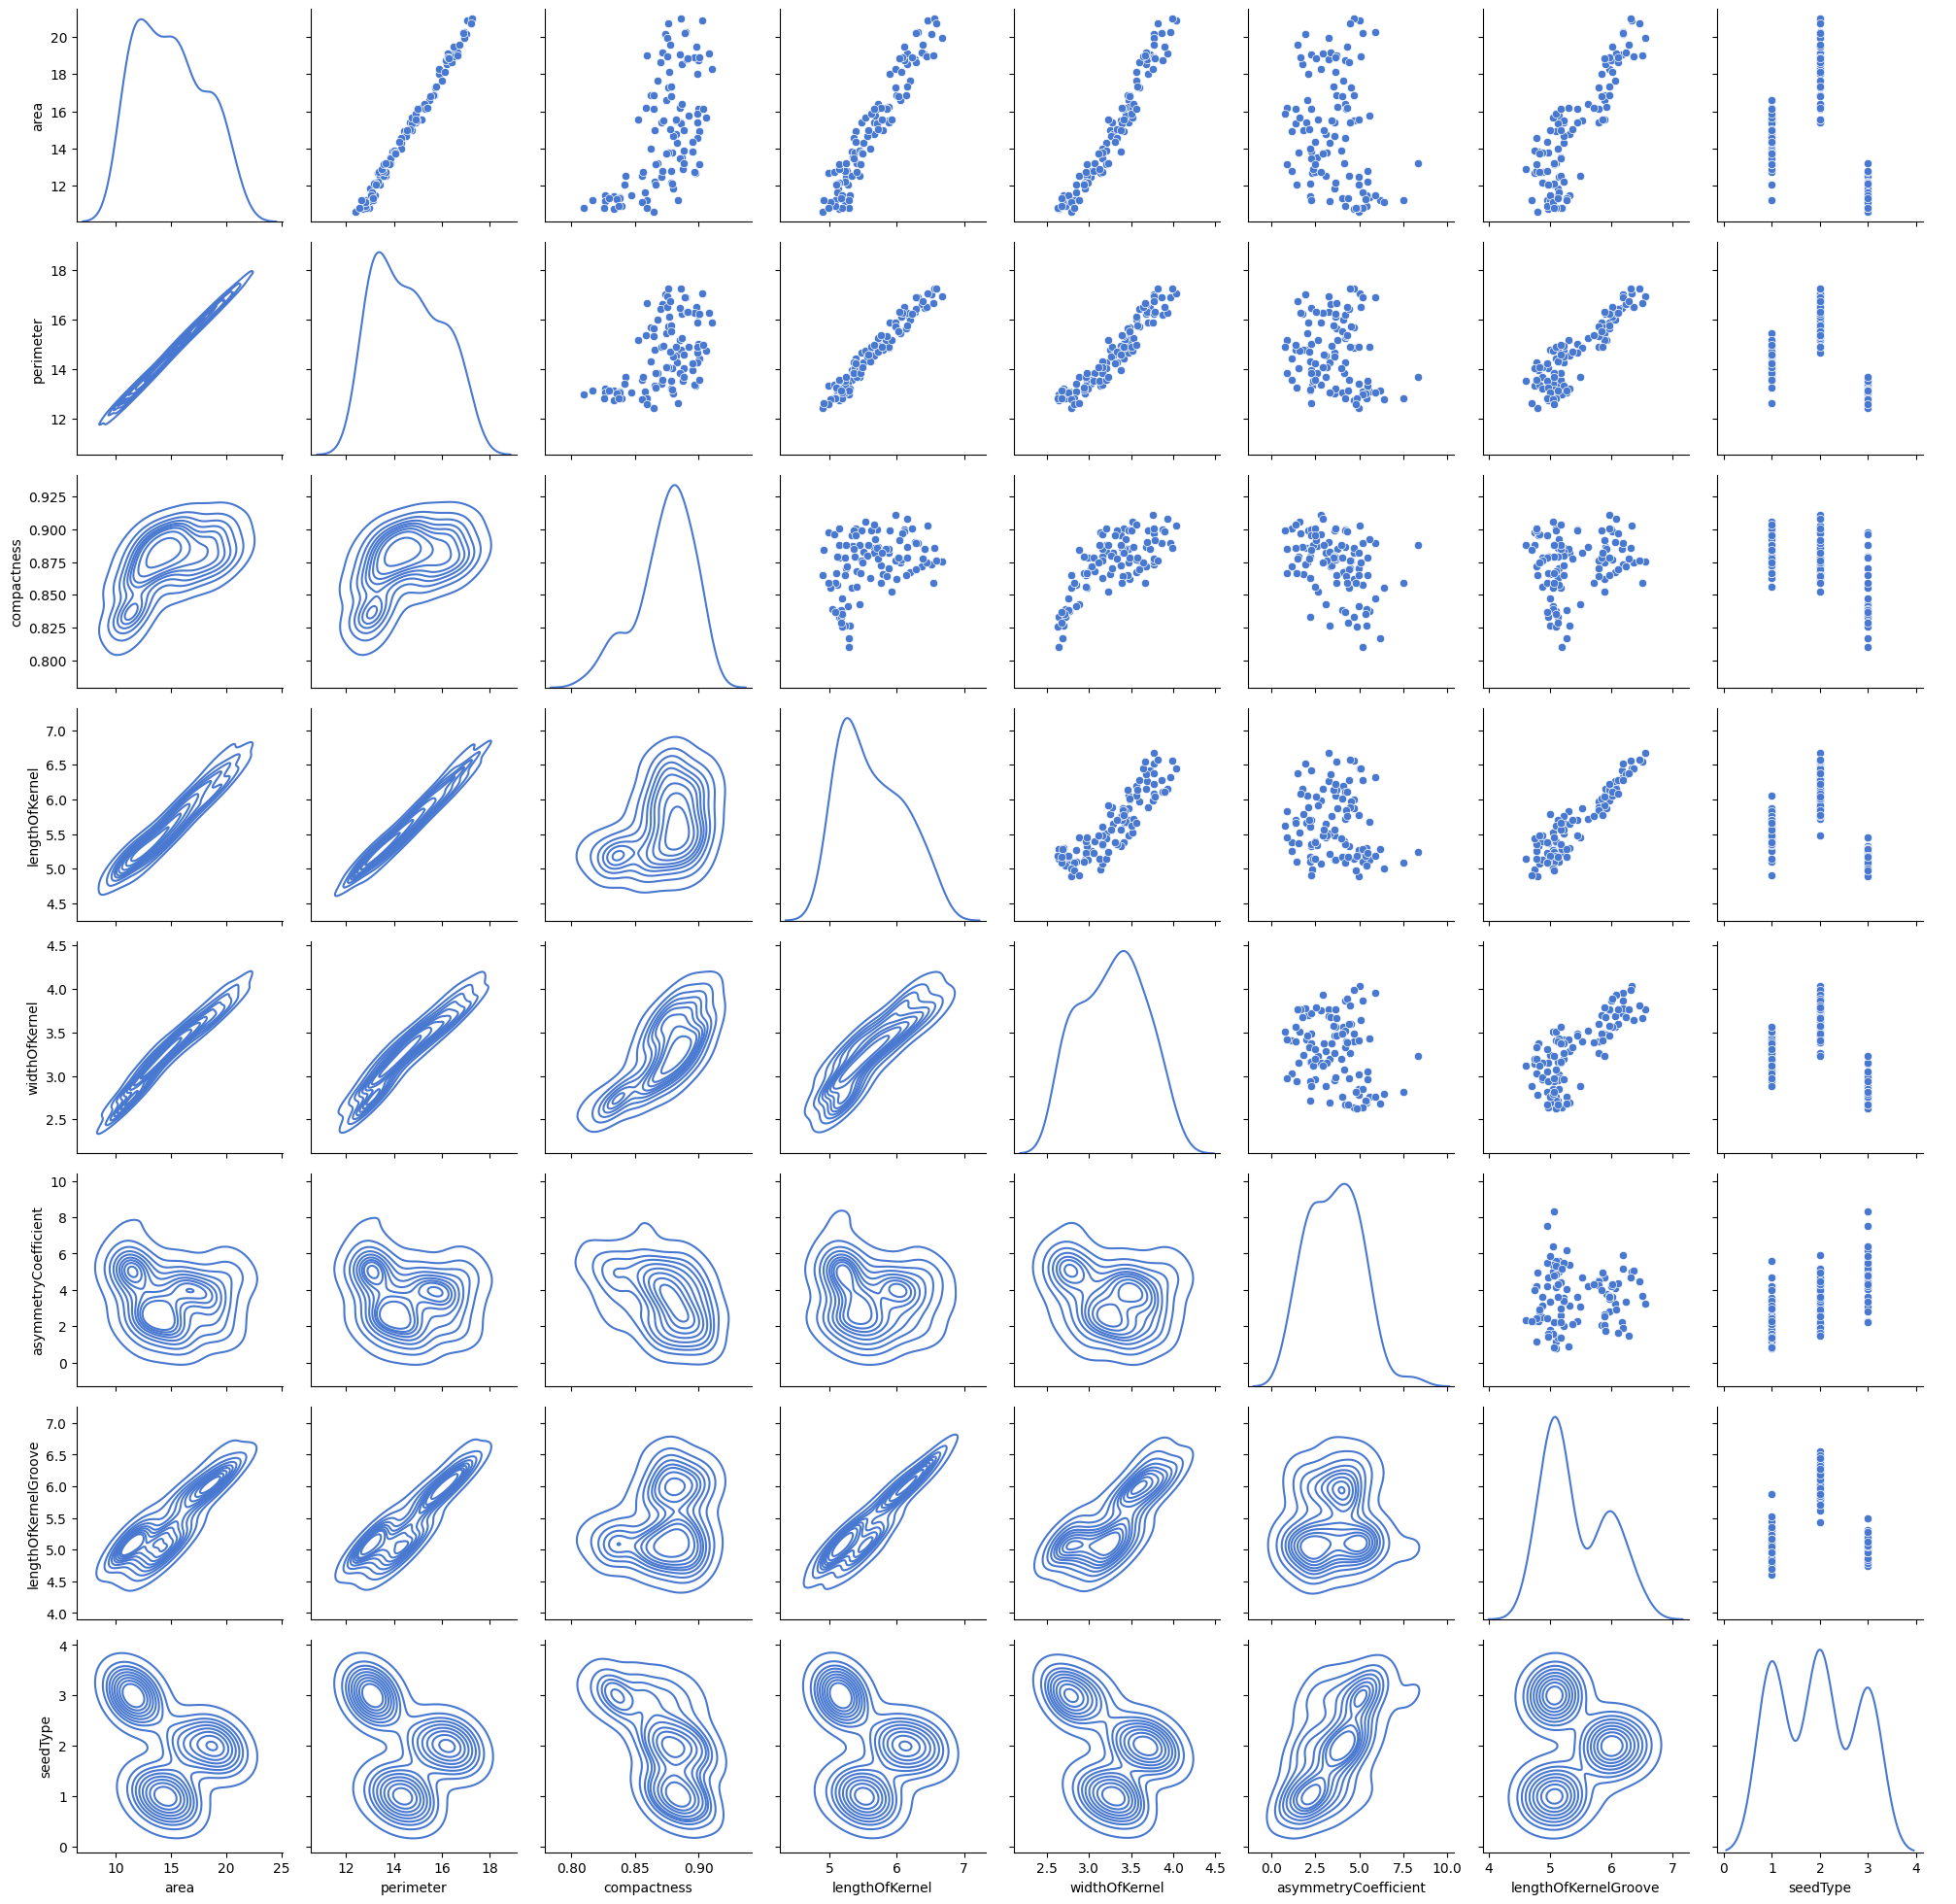

In [8]:
#using different functions on the upper and lower triangles of the plot
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

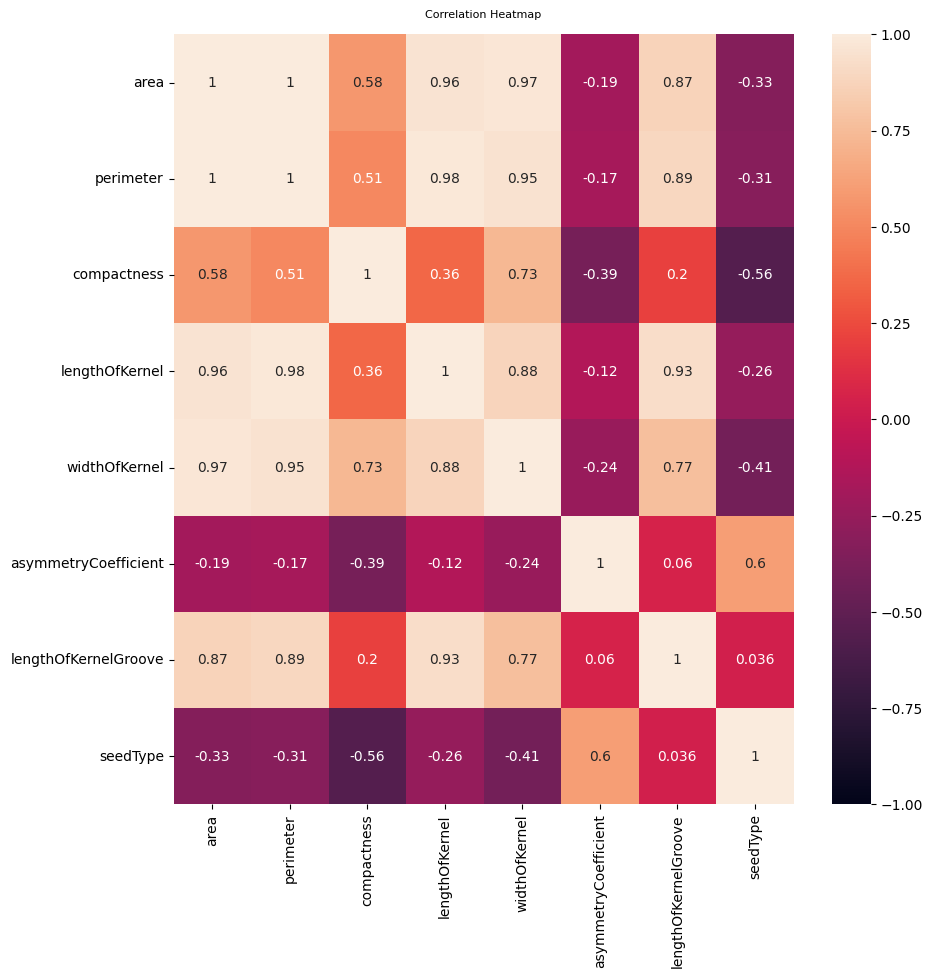

In [9]:
# plot the correlation coefficient between variables scaled in -1,1
import matplotlib.pyplot as plt
#import seaborn as sns 

plt.figure(figsize=(10, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)
plt.show()

In [10]:
# %% standardise the variables 
from sklearn.preprocessing import StandardScaler

scaled_columns = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=df.columns)

In [11]:
#Create training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(scaled_df, test_size=.4, random_state=42)

predictors_train = train_set.drop('seedType', axis=1)

labels_train = df.loc[predictors_train.index,'seedType']

predictors_test = test_set.drop('seedType', axis=1)

labels_test = df.loc[predictors_test.index,'seedType']

#first five rows of the test set within our dataset 
test_set.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
89,1.985907,1.815933,1.334628,1.750194,2.000886,0.959714,1.766732,0.059719
154,-1.215371,-1.145057,-1.605921,-0.993900,-1.392083,0.313623,-0.310379,1.313813
114,2.016171,1.963982,0.555315,1.993396,1.891950,0.733449,1.756916,0.059719
78,1.333545,1.401394,0.061448,1.739433,0.956692,0.991751,1.847225,0.059719
159,-1.171656,-1.019215,-2.145097,-0.716262,-1.551502,1.208005,-0.218107,1.313813


In [12]:
#Training the data and builbing a predictive model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

#standardise the variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(x)

scaled_columns = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=df.columns)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

#using random forest for the predictive model
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[22  0  0]
 [ 0 30  0]
 [ 0  0 21]]


Overall Accuracy - Train:  1.0


Confusion Matrix - Test: 
 [[12  1  1]
 [ 0  8  0]
 [ 1  0  9]]


Overall Accuracy - Test:  0.90625


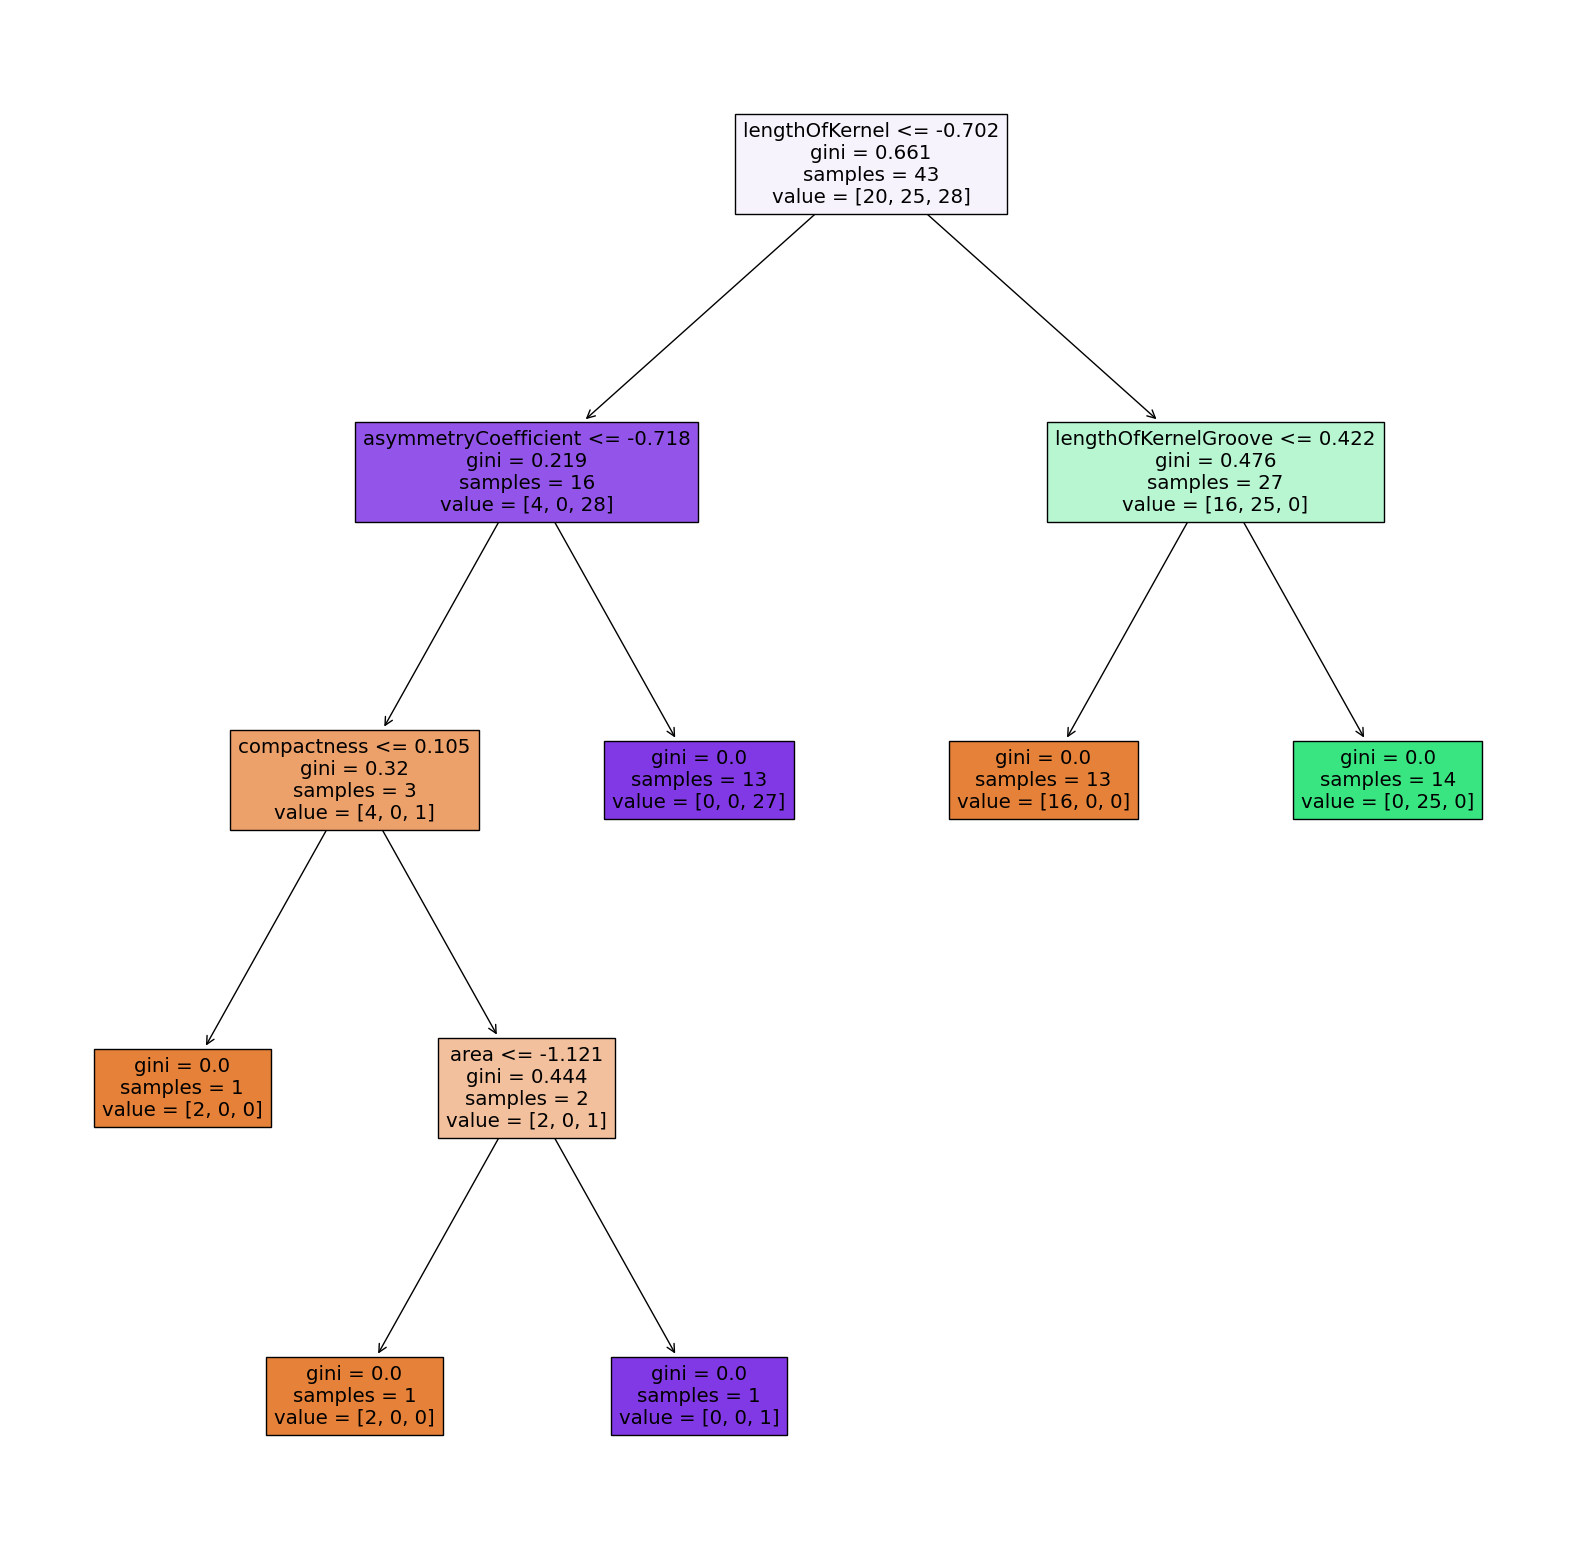

In [13]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=df.columns, filled=True)

In [14]:
#Gaussian Naive Bayes algorithm for classification

#training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trains,y_train)

#making predictions on the training set
y_train_pred = gnb.predict(X_trains)
y_train_prob = gnb.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

#making predictions on the testing set
y_test_pred = gnb.predict(X_tests)
y_test_prob = gnb.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[21  0  1]
 [ 1 29  0]
 [ 2  0 19]]


Overall Accuracy - Train:  0.9452054794520548


Confusion Matrix - Test: 
 [[12  1  1]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  0.9375


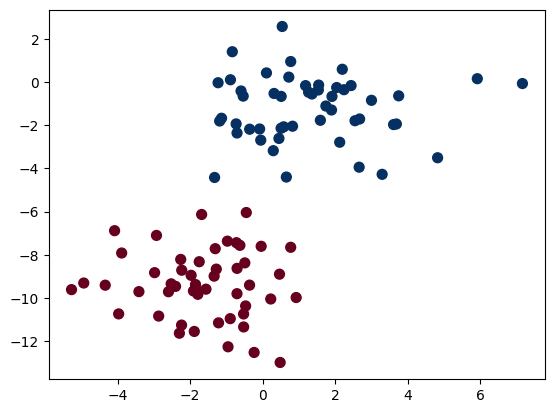

In [15]:
import itertools
from scipy.stats import norm
import scipy.stats
import matplotlib.colors as colors

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


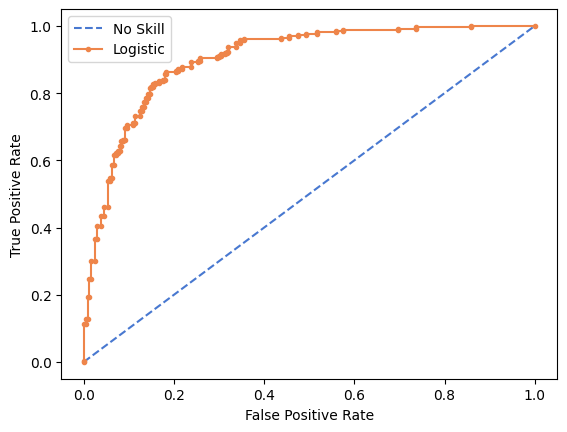

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


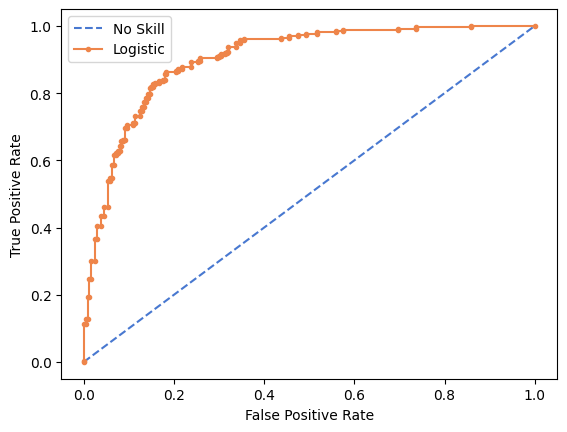

In [16]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()